# Cluster Qinj Mapping, Ext VRef = 1 V

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from fnmatch import fnmatch
import hist
from hist import Hist

### List all relevant files

In [17]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*testing_[0-9]*"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_0.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_4.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_5.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_7.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_8_7/TDC_Data_translated_6.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_2.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_3.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_15/TDC_Data_translated_1.dat
../ETROC-Data/2023-05-19_Array_Test_Results/E2_testing_15_1

### Analyze files line by line

In [18]:
hit_counts = np.zeros((16,16))
CAL_sum = np.zeros((16,16))
CAL_sum_sq = np.zeros((16,16))
TOA_sum = np.zeros((16,16))
TOA_sum_sq = np.zeros((16,16))
TOT_sum = np.zeros((16,16))
TOT_sum_sq = np.zeros((16,16))

total_files = len(file_list)
for file_index, file_name in enumerate(file_list):
    print(f"{file_index+1}/{total_files}")
    with open(file_name) as infile:
        for line in infile:
            text_list = line.split()
            if text_list[2]!="DATA": continue
            col = int(text_list[6])
            row = int(text_list[8])
            TOA = int(text_list[10])
            TOT = int(text_list[12])
            CAL = int(text_list[14])
            hit_counts[row, col] += 1 
            CAL_sum[row, col] += CAL
            CAL_sum_sq[row, col] += CAL*CAL
            TOA_sum[row, col] += TOA
            TOA_sum_sq[row, col] += TOA*TOA
            TOT_sum[row, col] += TOT
            TOT_sum_sq[row, col] += TOT*TOT

1/102
2/102
3/102
4/102
5/102
6/102
7/102
8/102
9/102
10/102
11/102
12/102
13/102
14/102
15/102
16/102
17/102
18/102
19/102
20/102
21/102
22/102
23/102
24/102
25/102
26/102
27/102
28/102
29/102
30/102
31/102
32/102
33/102
34/102
35/102
36/102
37/102
38/102
39/102
40/102
41/102
42/102
43/102
44/102
45/102
46/102
47/102
48/102
49/102
50/102
51/102
52/102
53/102
54/102
55/102
56/102
57/102
58/102
59/102
60/102
61/102
62/102
63/102
64/102
65/102
66/102
67/102
68/102
69/102
70/102
71/102
72/102
73/102
74/102
75/102
76/102
77/102
78/102
79/102
80/102
81/102
82/102
83/102
84/102
85/102
86/102
87/102
88/102
89/102
90/102
91/102
92/102
93/102
94/102
95/102
96/102
97/102
98/102
99/102
100/102
101/102
102/102


In [77]:
CAL_mean = CAL_sum/hit_counts
# CAL_std = np.sqrt(((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))/hit_counts)
CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
TOA_mean = TOA_sum/hit_counts
TOA_std = np.sqrt(((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2)))
TOT_mean = TOT_sum/hit_counts
TOT_std = np.sqrt(((TOT_sum_sq/hit_counts) - pow(TOT_mean, 2)))

/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:1: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:4: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt(((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2)))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:6: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_96363/2705216575.py:7: RuntimeWarning: invali

### Plot maps

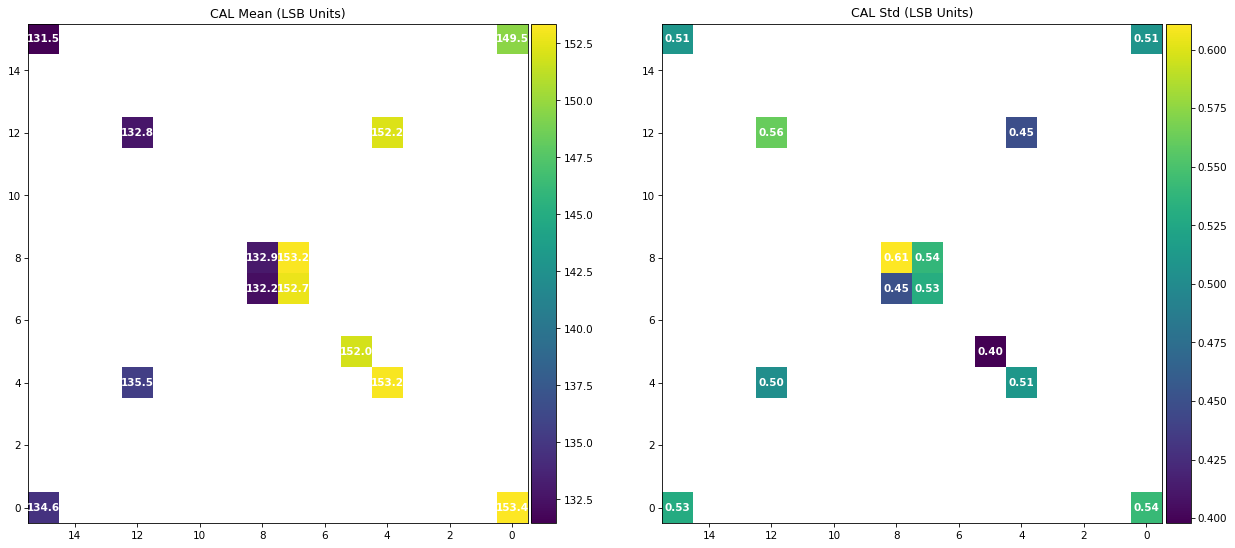

In [89]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("CAL Mean (LSB Units)")
img0 = ax0.imshow(CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("CAL Std (LSB Units)")
img1 = ax1.imshow(CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

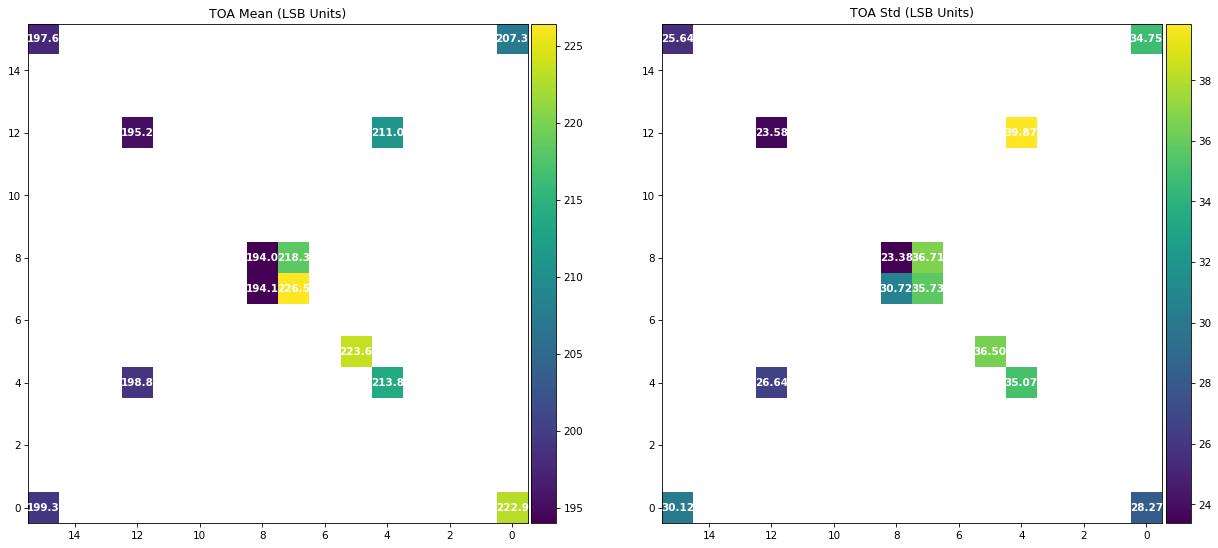

In [88]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOA Mean (LSB Units)")
img0 = ax0.imshow(TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOA Std (LSB Units)")
img1 = ax1.imshow(TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

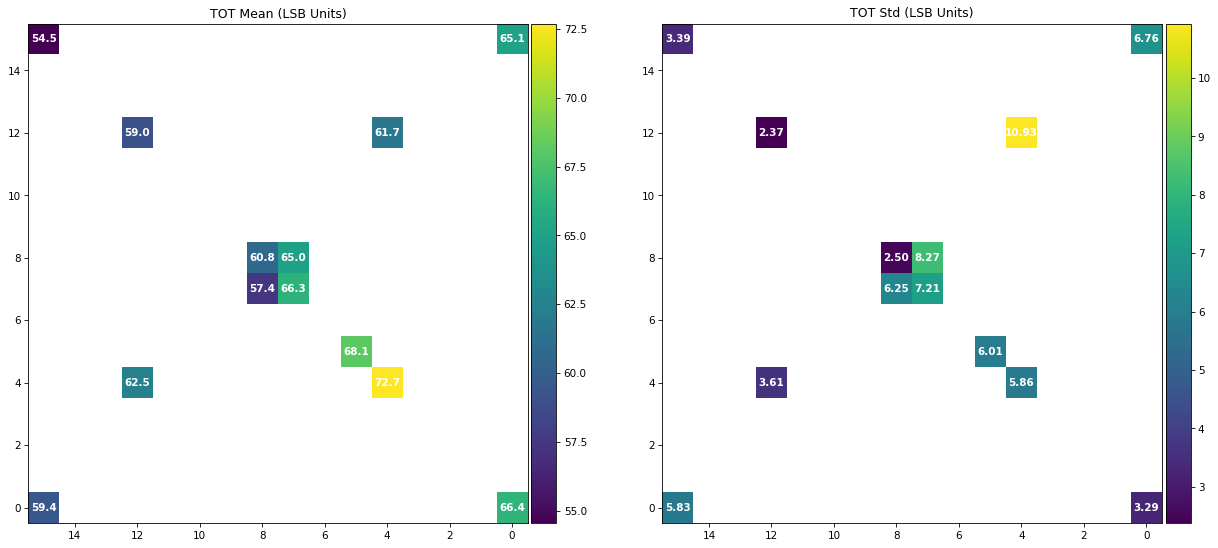

In [87]:
fig = plt.figure(dpi=75, figsize=(20,20))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOT Mean (LSB Units)")
img0 = ax0.imshow(TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOT Std (LSB Units)")
img1 = ax1.imshow(TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(CAL_mean[x,y])): continue
        ax0.text(x, y, f"{TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white")
        if(np.isnan(CAL_std[x,y])): continue
        ax1.text(x, y, f"{TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white")

plt.show()

In [157]:
def deliver_acc_stats(file_list):
    hit_counts = np.zeros((16,16))
    CAL_sum = np.zeros((16,16))
    CAL_sum_sq = np.zeros((16,16))
    TOA_sum = np.zeros((16,16))
    TOA_sum_sq = np.zeros((16,16))
    TOT_sum = np.zeros((16,16))
    TOT_sum_sq = np.zeros((16,16))
    current_bcid = -1
    previous_bcid = -1
    min_toa = np.inf
    max_toa = -1
    
    total_files = len(file_list)
    for file_index, file_name in enumerate(file_list):
        print(f"{file_index+1}/{total_files}")
        with open(file_name) as infile:
            for line in infile:
                text_list = line.split()
                if text_list[2]=="HEADER":
                    current_bcid = int(text_list[8])
                if text_list[2]=="TRAILER":
                    previous_bcid = current_bcid
                if(current_bcid-previous_bcid!=1054 or previous_bcid==-1): 
                    # print(current_bcid, previous_bcid)
                    continue # The diff is 2x24
                if text_list[2]!="DATA": continue
                col = int(text_list[6])
                row = int(text_list[8])
                TOA = int(text_list[10])
                TOT = int(text_list[12])
                CAL = int(text_list[14])
                # if (row!=3 or col!=3):
                #     print(previous_bcid, current_bcid, row, col, TOA, TOT, CAL)
                if(CAL>200): continue
                hit_counts[row, col] += 1 
                CAL_sum[row, col] += CAL
                CAL_sum_sq[row, col] += CAL*CAL
                TOA_sum[row, col] += TOA
                TOA_sum_sq[row, col] += TOA*TOA
                TOT_sum[row, col] += TOT
                TOT_sum_sq[row, col] += TOT*TOT
    
                if(TOA<min_toa): min_toa = TOA
                if(TOA>max_toa): max_toa = TOA
    print("Min TOA:",min_toa,". Max TOA:", max_toa)
    return hit_counts,CAL_sum,CAL_sum_sq,TOA_sum,TOA_sum_sq,TOT_sum,TOT_sum_sq

In [161]:
def compute_stats(returned_package):
    hit_counts,CAL_sum,CAL_sum_sq,TOA_sum,TOA_sum_sq,TOT_sum,TOT_sum_sq = returned_package
    CAL_mean = CAL_sum/hit_counts
    CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
    TOA_mean = TOA_sum/hit_counts
    TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
    TOT_mean = TOT_sum/hit_counts
    TOT_std = np.sqrt((TOT_sum_sq/hit_counts) - pow(TOT_mean, 2))
    return CAL_mean,CAL_std,TOA_mean,TOA_std,TOT_mean,TOT_std

## Single Pixel

In [162]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_0.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_4.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_5.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_7.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_6.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Centers/TDC_Data_translated_12.dat
../ETROC-Data/2023-06-06_Array_Test_

In [163]:
returned_package = deliver_acc_stats(file_list)
center_CAL_mean,center_CAL_std,center_TOA_mean,center_TOA_std,center_TOT_mean,center_TOT_std = compute_stats(returned_package)

1/14
2/14
3/14
4/14
5/14
6/14
7/14
8/14
9/14
10/14
11/14
12/14
13/14
14/14
Min TOA: 179 . Max TOA: 217


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:8: RuntimeWarning: invalid 

## Single Pixel Qinj + Cluster Readout

In [164]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_27.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_26.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_18.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_24.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_25.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_Single/TDC_Data_translated_19.dat
../ETROC-Data/2023-06-06_Array_Test_Resu

In [165]:
returned_package = deliver_acc_stats(file_list)
single_CAL_mean,single_CAL_std,single_TOA_mean,single_TOA_std,single_TOT_mean,single_TOT_std = compute_stats(returned_package)

1/29
2/29
3/29
4/29
5/29
6/29
7/29
8/29
9/29
10/29
11/29
12/29
13/29
14/29
15/29
16/29
17/29
18/29
19/29
20/29
21/29
22/29
23/29
24/29
25/29
26/29
27/29
28/29
29/29
Min TOA: 179 . Max TOA: 217


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:8: RuntimeWarning: invalid 

## Cluster Qinj

In [167]:
root = '../ETROC-Data'
file_pattern = "*translated*.dat"
path_pattern = "*2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual"
file_list = []
for path, subdirs, files in os.walk(root):
    if not fnmatch(path, path_pattern): continue
    for name in files:
        pass
        if fnmatch(name, file_pattern):
            file_list.append(os.path.join(path, name))
            print(file_list[-1])

../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_2.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_33.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_27.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_26.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_32.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_3.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_1.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_18.dat
../ETROC-Data/2023-06-06_Array_Test_Results/E2_testing_VRef_Qinj_Cluster_AllEqual/TDC_Data_translated_24.dat
../ETROC-Data/2023-06-

In [168]:
returned_package = deliver_acc_stats(file_list)
allequal_CAL_mean,allequal_CAL_std,allequal_TOA_mean,allequal_TOA_std,allequal_TOT_mean,allequal_TOT_std = compute_stats(returned_package)

1/42
2/42
3/42
4/42
5/42
6/42
7/42
8/42
9/42
10/42
11/42
12/42
13/42
14/42
15/42
16/42
17/42
18/42
19/42
20/42
21/42
22/42
23/42
24/42
25/42
26/42
27/42
28/42
29/42
30/42
31/42
32/42
33/42
34/42
35/42
36/42
37/42
38/42
39/42
40/42
41/42
42/42
Min TOA: 172 . Max TOA: 218


/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:3: RuntimeWarning: invalid value encountered in divide
  CAL_mean = CAL_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:4: RuntimeWarning: invalid value encountered in divide
  CAL_std = np.sqrt((CAL_sum_sq/hit_counts) - pow(CAL_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:5: RuntimeWarning: invalid value encountered in divide
  TOA_mean = TOA_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:6: RuntimeWarning: invalid value encountered in divide
  TOA_std = np.sqrt((TOA_sum_sq/hit_counts) - pow(TOA_mean, 2))
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:7: RuntimeWarning: invalid value encountered in divide
  TOT_mean = TOT_sum/hit_counts
/var/folders/h9/jf9lvlw131x_11_x8syn64cm0000gr/T/ipykernel_94402/3883026886.py:8: RuntimeWarning: invalid 

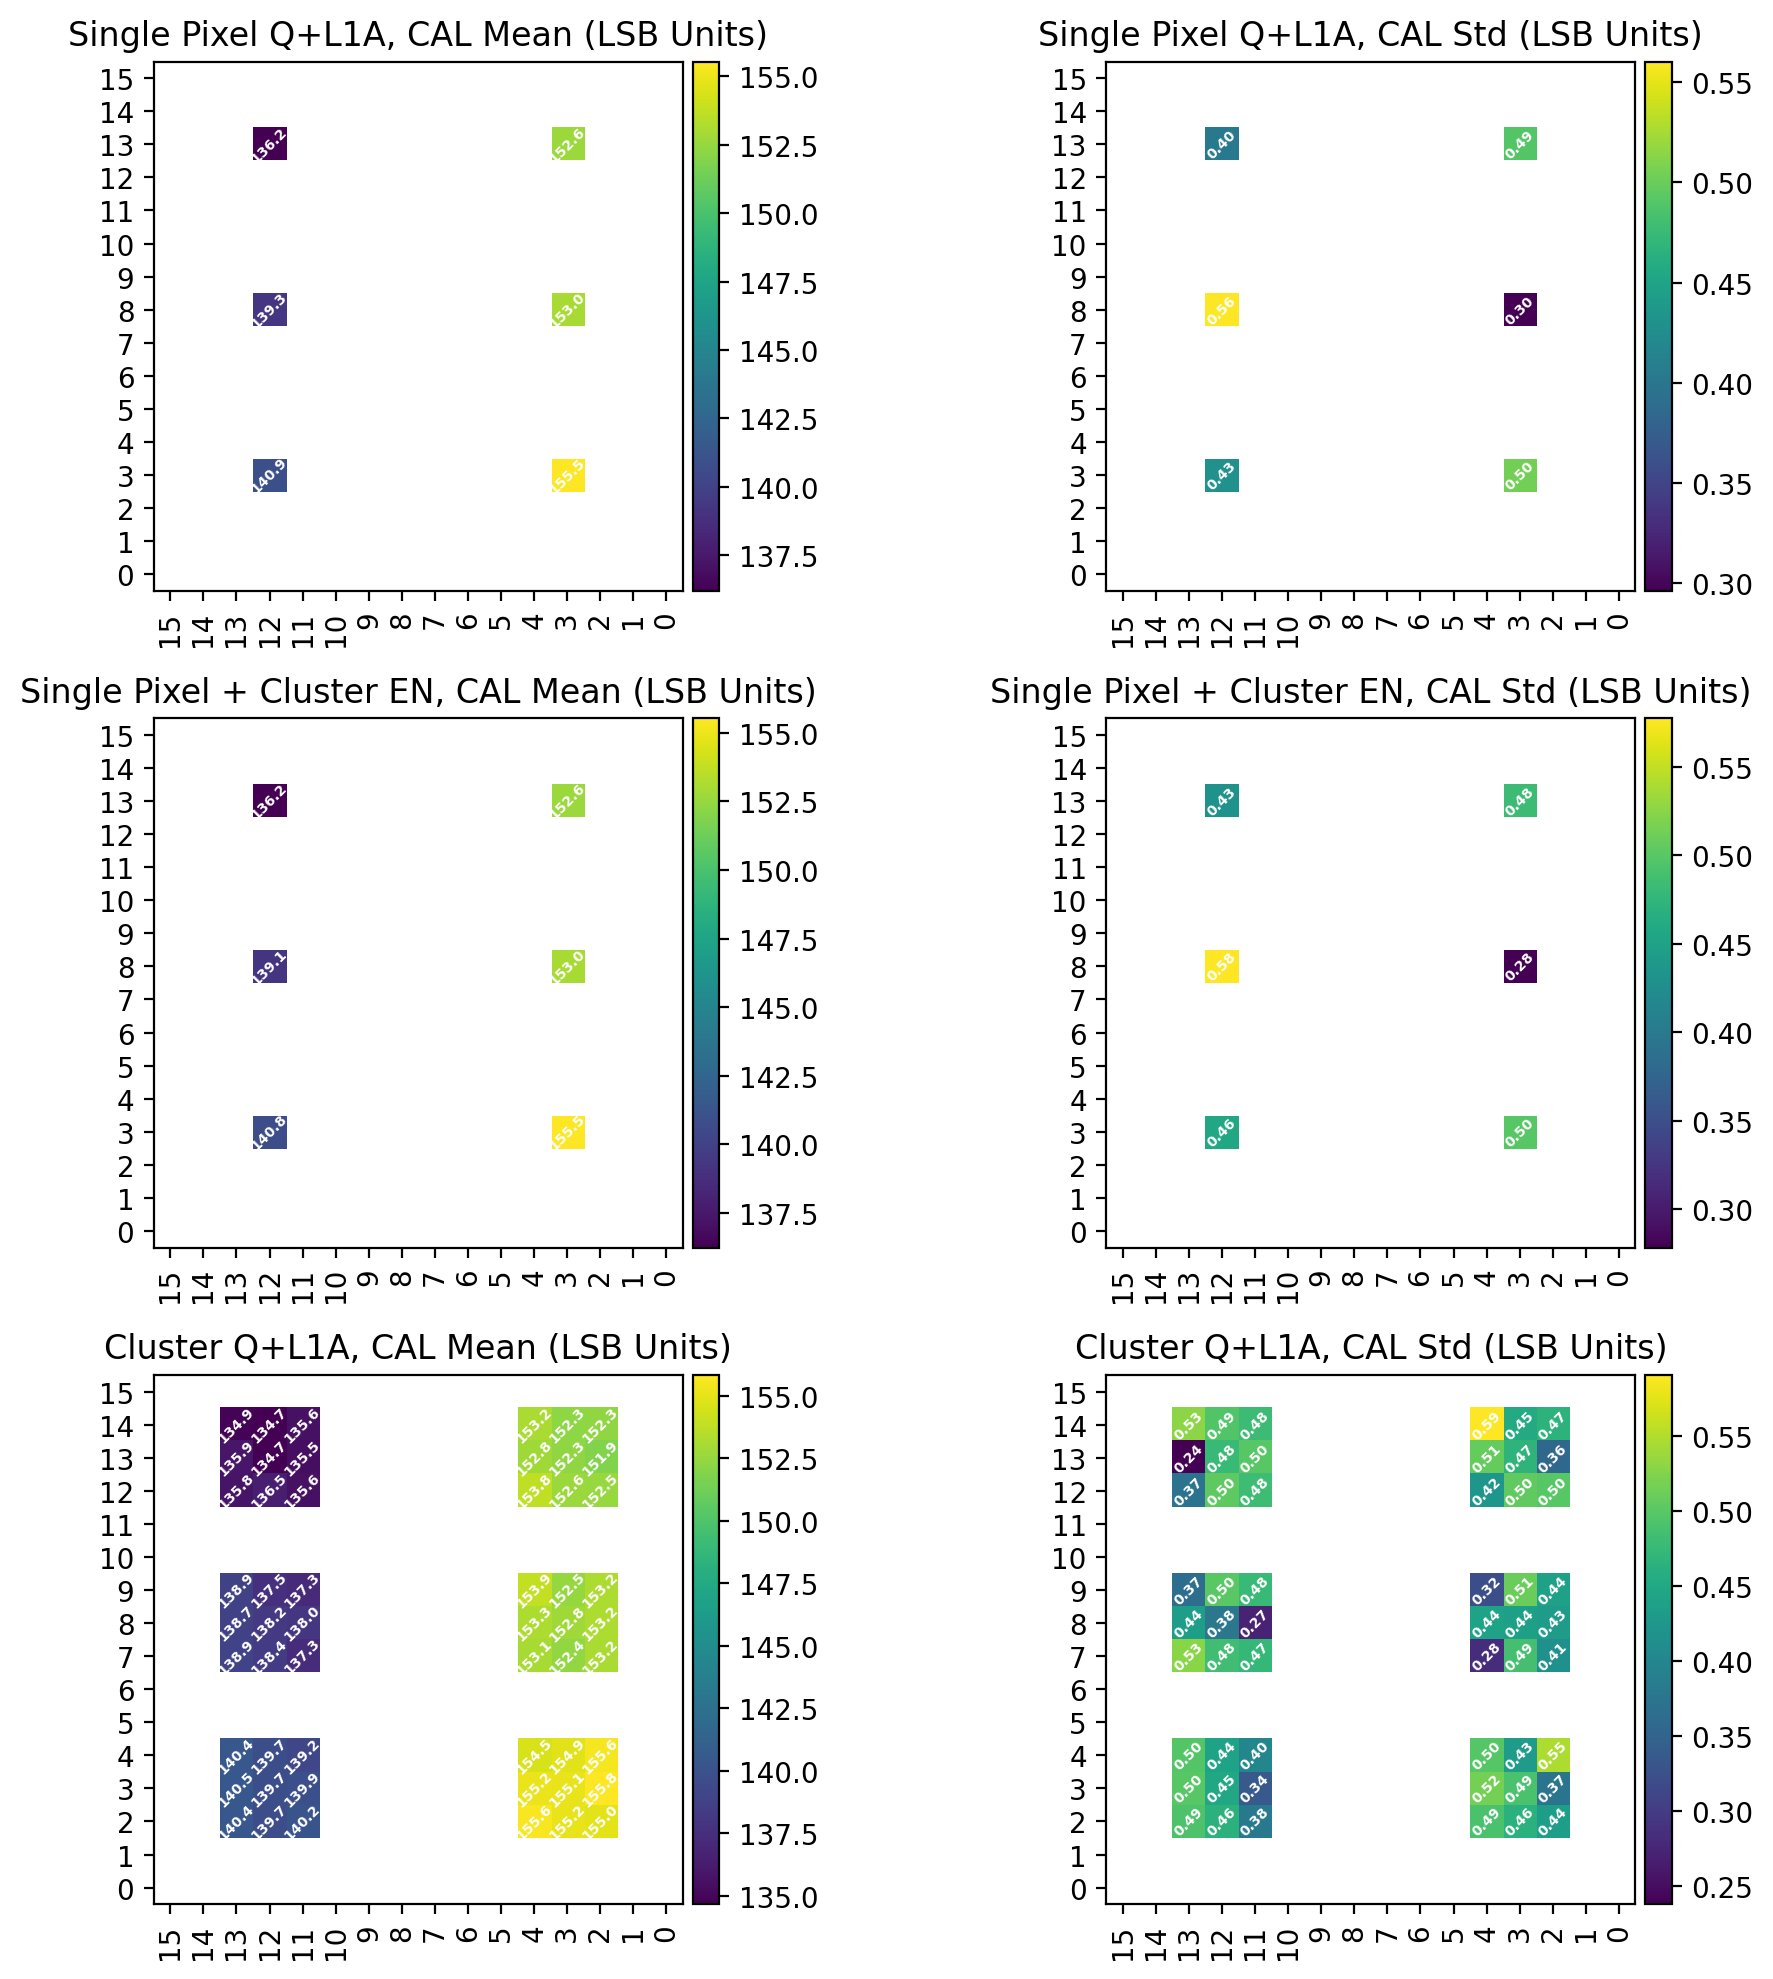

In [170]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(3,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("Single Pixel Q+L1A, CAL Mean (LSB Units)")
img0 = ax0.imshow(center_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("Single Pixel Q+L1A, CAL Std (LSB Units)")
img1 = ax1.imshow(center_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{center_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[1,0])
ax0.set_title("Single Pixel + Cluster EN, CAL Mean (LSB Units)")
img0 = ax0.imshow(single_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[1,1])
ax1.set_title("Single Pixel + Cluster EN, CAL Std (LSB Units)")
img1 = ax1.imshow(single_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(single_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{single_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(single_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{single_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)

ax0 = fig.add_subplot(gs[2,0])
ax0.set_title("Cluster Q+L1A, CAL Mean (LSB Units)")
img0 = ax0.imshow(allequal_CAL_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[2,1])
ax1.set_title("Cluster Q+L1A, CAL Std (LSB Units)")
img1 = ax1.imshow(allequal_CAL_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(allequal_CAL_mean.T[x,y])): continue
        ax0.text(x, y, f"{allequal_CAL_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(allequal_CAL_std.T[x,y])): continue
        ax1.text(x, y, f"{allequal_CAL_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)


plt.tight_layout()
plt.savefig("figures/cluster_CAL_scan.pdf")
plt.show()

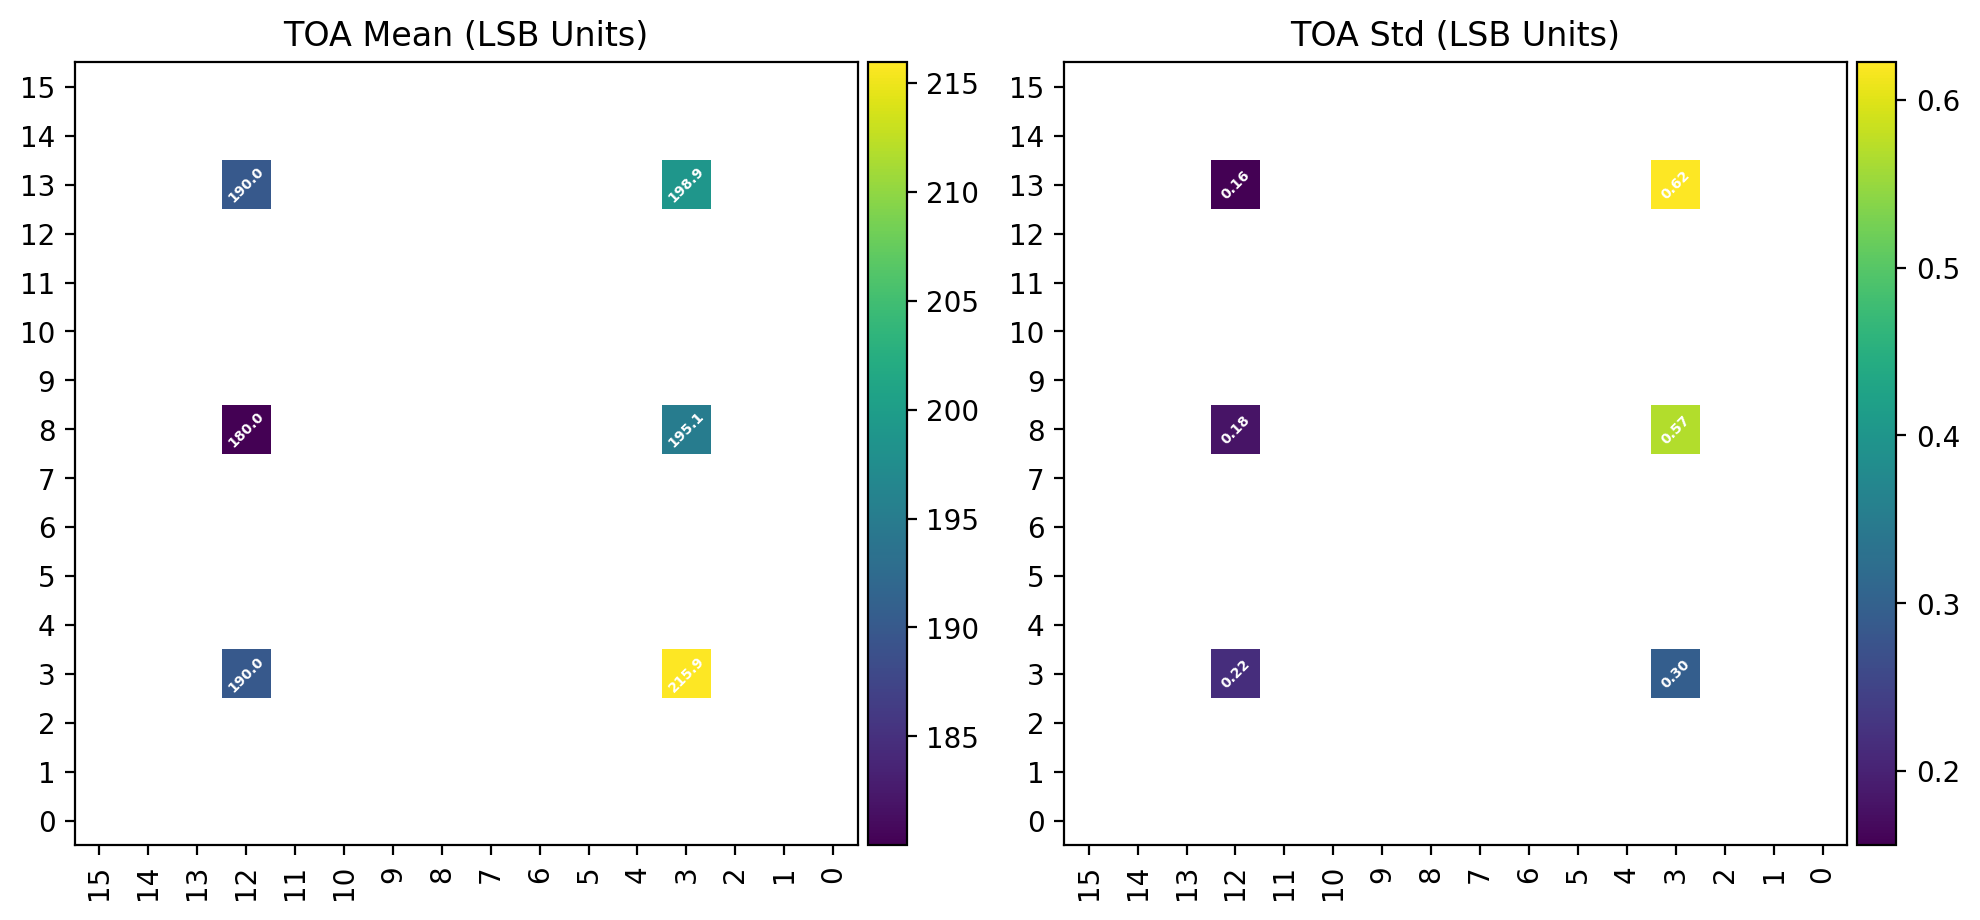

In [134]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOA Mean (LSB Units)")
img0 = ax0.imshow(center_TOA_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOA Std (LSB Units)")
img1 = ax1.imshow(center_TOA_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_TOA_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_TOA_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_TOA_std.T[x,y])): continue
        ax1.text(x, y, f"{center_TOA_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
plt.tight_layout()
plt.savefig("figures/clusterCenters_TOA_scan.pdf")
plt.show()

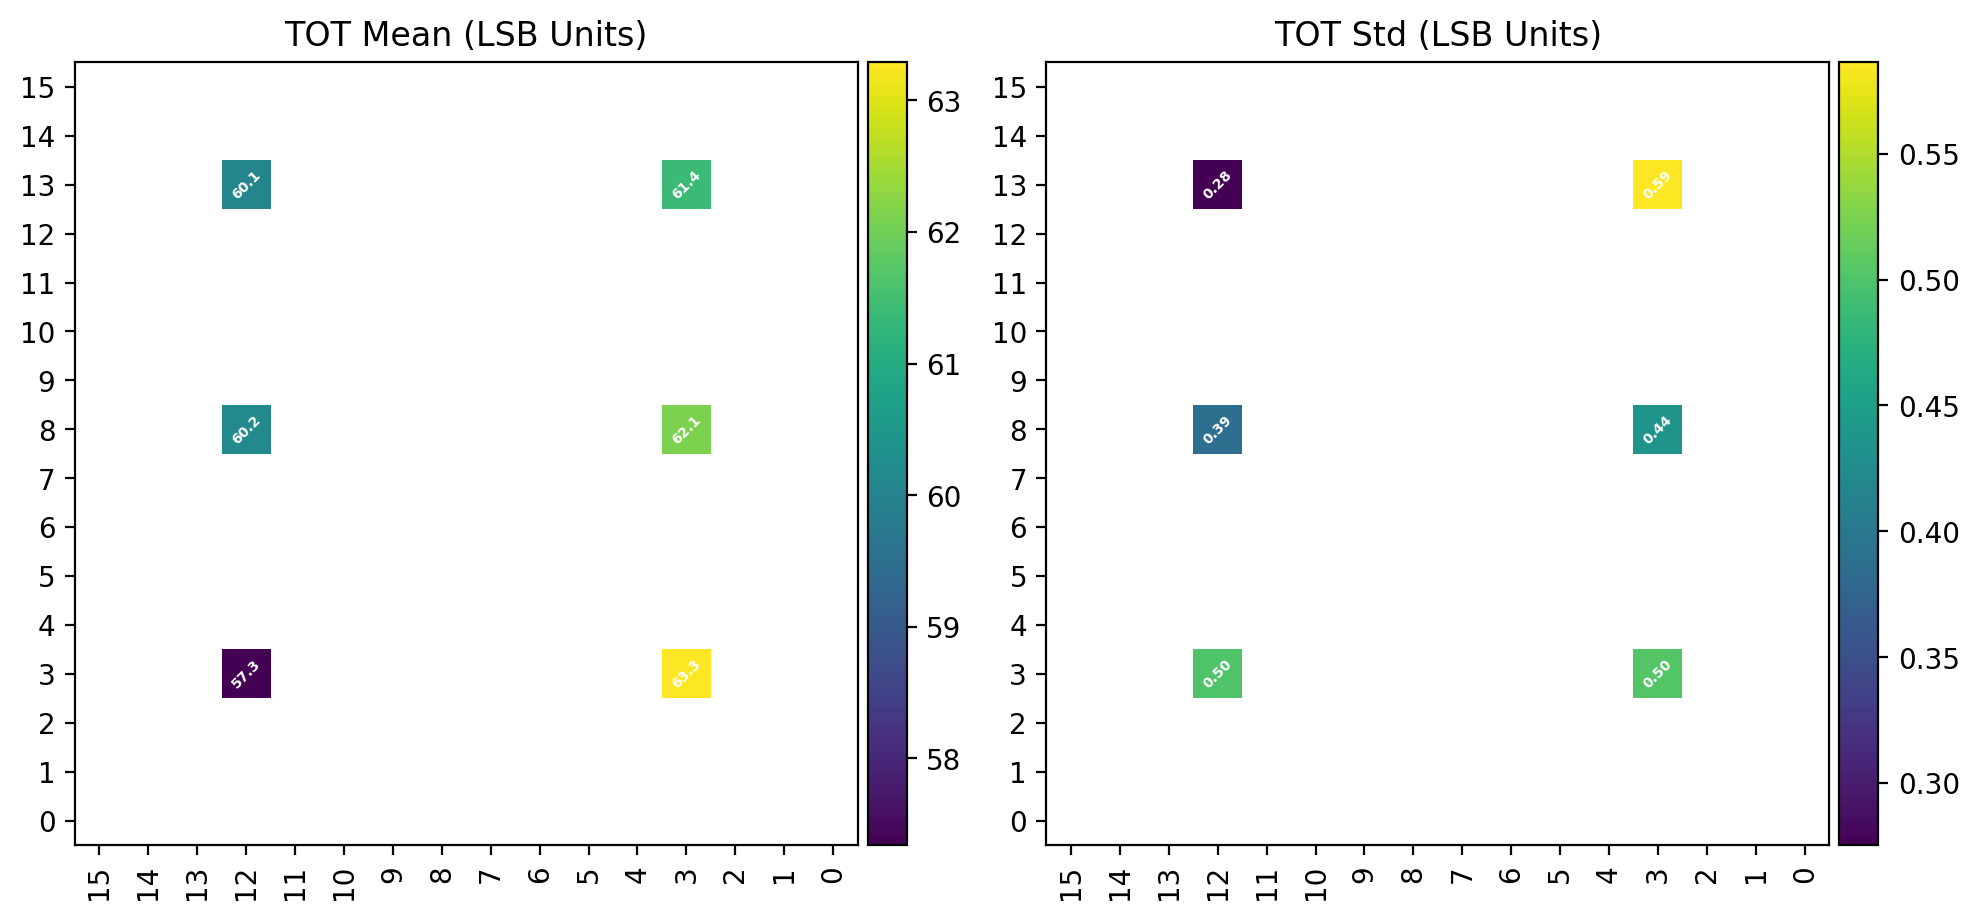

In [135]:
fig = plt.figure(dpi=200, figsize=(10,10))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax0.set_title("TOT Mean (LSB Units)")
img0 = ax0.imshow(center_TOT_mean)
ax0.invert_xaxis()
ax0.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img0, cax=cax, orientation='vertical')

ax1 = fig.add_subplot(gs[0,1])
ax1.set_title("TOT Std (LSB Units)")
img1 = ax1.imshow(center_TOT_std)
ax1.invert_xaxis()
ax1.invert_yaxis()
plt.xticks(range(16), range(16), rotation='vertical')
plt.yticks(range(16), range(16))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(img1, cax=cax, orientation='vertical')

for x in range(16):
    for y in range(16):
        if(np.isnan(center_TOT_mean.T[x,y])): continue
        ax0.text(x, y, f"{center_TOT_mean.T[x,y]:.1f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
        if(np.isnan(center_TOT_std.T[x,y])): continue
        ax1.text(x, y, f"{center_TOT_std.T[x,y]:.2f}", ha="center", va="center", fontweight="bold", c="white", size=5, rotation=45)
plt.tight_layout()
plt.savefig("figures/clusterCenters_TOT_scan.pdf")
plt.show()

### Hist Distributions

In [122]:
h = [[(
        Hist.new.Integer(125, 165, name="CAL", label="CAL [LSB]")
        .Integer(45, 85, name="TOT", label="TOT [LSB]")
        .Integer(150, 275, name="TOA", label="TOA [LSB]")
        .Double()
      ) if not np.isnan(center_CAL_mean[i,j]) else np.nan
      for j in range(16)] 
     for i in range(16)]
previous_bcid = -1
current_bcid = -1

total_files = len(file_list)
for file_index, file_name in enumerate(file_list):
    print(f"{file_index+1}/{total_files}")
    with open(file_name) as infile:
        for line in infile:
            text_list = line.split()
            if text_list[2]=="HEADER":
                current_bcid = int(text_list[8])
            if text_list[2]=="TRAILER":
                previous_bcid = current_bcid
            if(current_bcid-previous_bcid<100): continue # The diff is 2x24
            if text_list[2]!="DATA": continue
            col = int(text_list[6])
            row = int(text_list[8])
            TOA = int(text_list[10])
            TOT = int(text_list[12])
            CAL = int(text_list[14])
            if not np.isnan(center_CAL_mean[row,col]): h[row][col].fill(CAL,TOT,TOA)

1/29
2/29
3/29
4/29
5/29
6/29
7/29
8/29
9/29
10/29
11/29
12/29
13/29
14/29
15/29
16/29
17/29
18/29
19/29
20/29
21/29
22/29
23/29
24/29
25/29
26/29
27/29
28/29
29/29


In [123]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(center_CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) CAL (LSB)")
        h[i][j].project("CAL").plot1d(ax=ax, histtype="fill")
        h[i][j].project("CAL").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.savefig("figures/clusterCenters_CAL_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0
4 1
4 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0
8 1
8 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
13 0
13 1
13 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3
14 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


In [124]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(center_CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) TOA (LSB)")
        h[i][j].project("TOA").plot1d(ax=ax, histtype="fill")
        h[i][j].project("TOA").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical', size=5)
plt.savefig("figures/clusterCenters_TOA_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

2 12
2 13
2 14
2 15
3 0
3 1
3 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

3 13
3 14
3 15
4 0
4 1
4 2
4 3
4 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 0
8 1
8 2
8 3


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
13 0
13 1
13 2
13 3


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


In [125]:
fig = plt.figure(dpi=300, figsize=(160,160))
gs = fig.add_gridspec(16,16)
for i in range(16):
    for j in range(16):
        print(i,j)
        if np.isnan(center_CAL_mean[i,j]): continue
        ax = fig.add_subplot(gs[15-i,15-j])
        ax.set_title(f"Pixel ({i},{j}) TOT (LSB)")
        h[i][j].project("TOT").plot1d(ax=ax, histtype="fill")
        h[i][j].project("TOT").plot1d(ax=ax, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
        ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
plt.savefig("figures/clusterCenters_TOT_chip.pdf")
plt.close()

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 0
2 1
2 2


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 0
3 1
3 2
3 3
3 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

4 13
4 14
4 15
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

7 14
7 15
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 0
9 1
9 2
9 3
9 4


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 0
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

12 14
12 15
13 0
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 0
14 1
14 2
14 3


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood in

14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
15 0
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15


/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


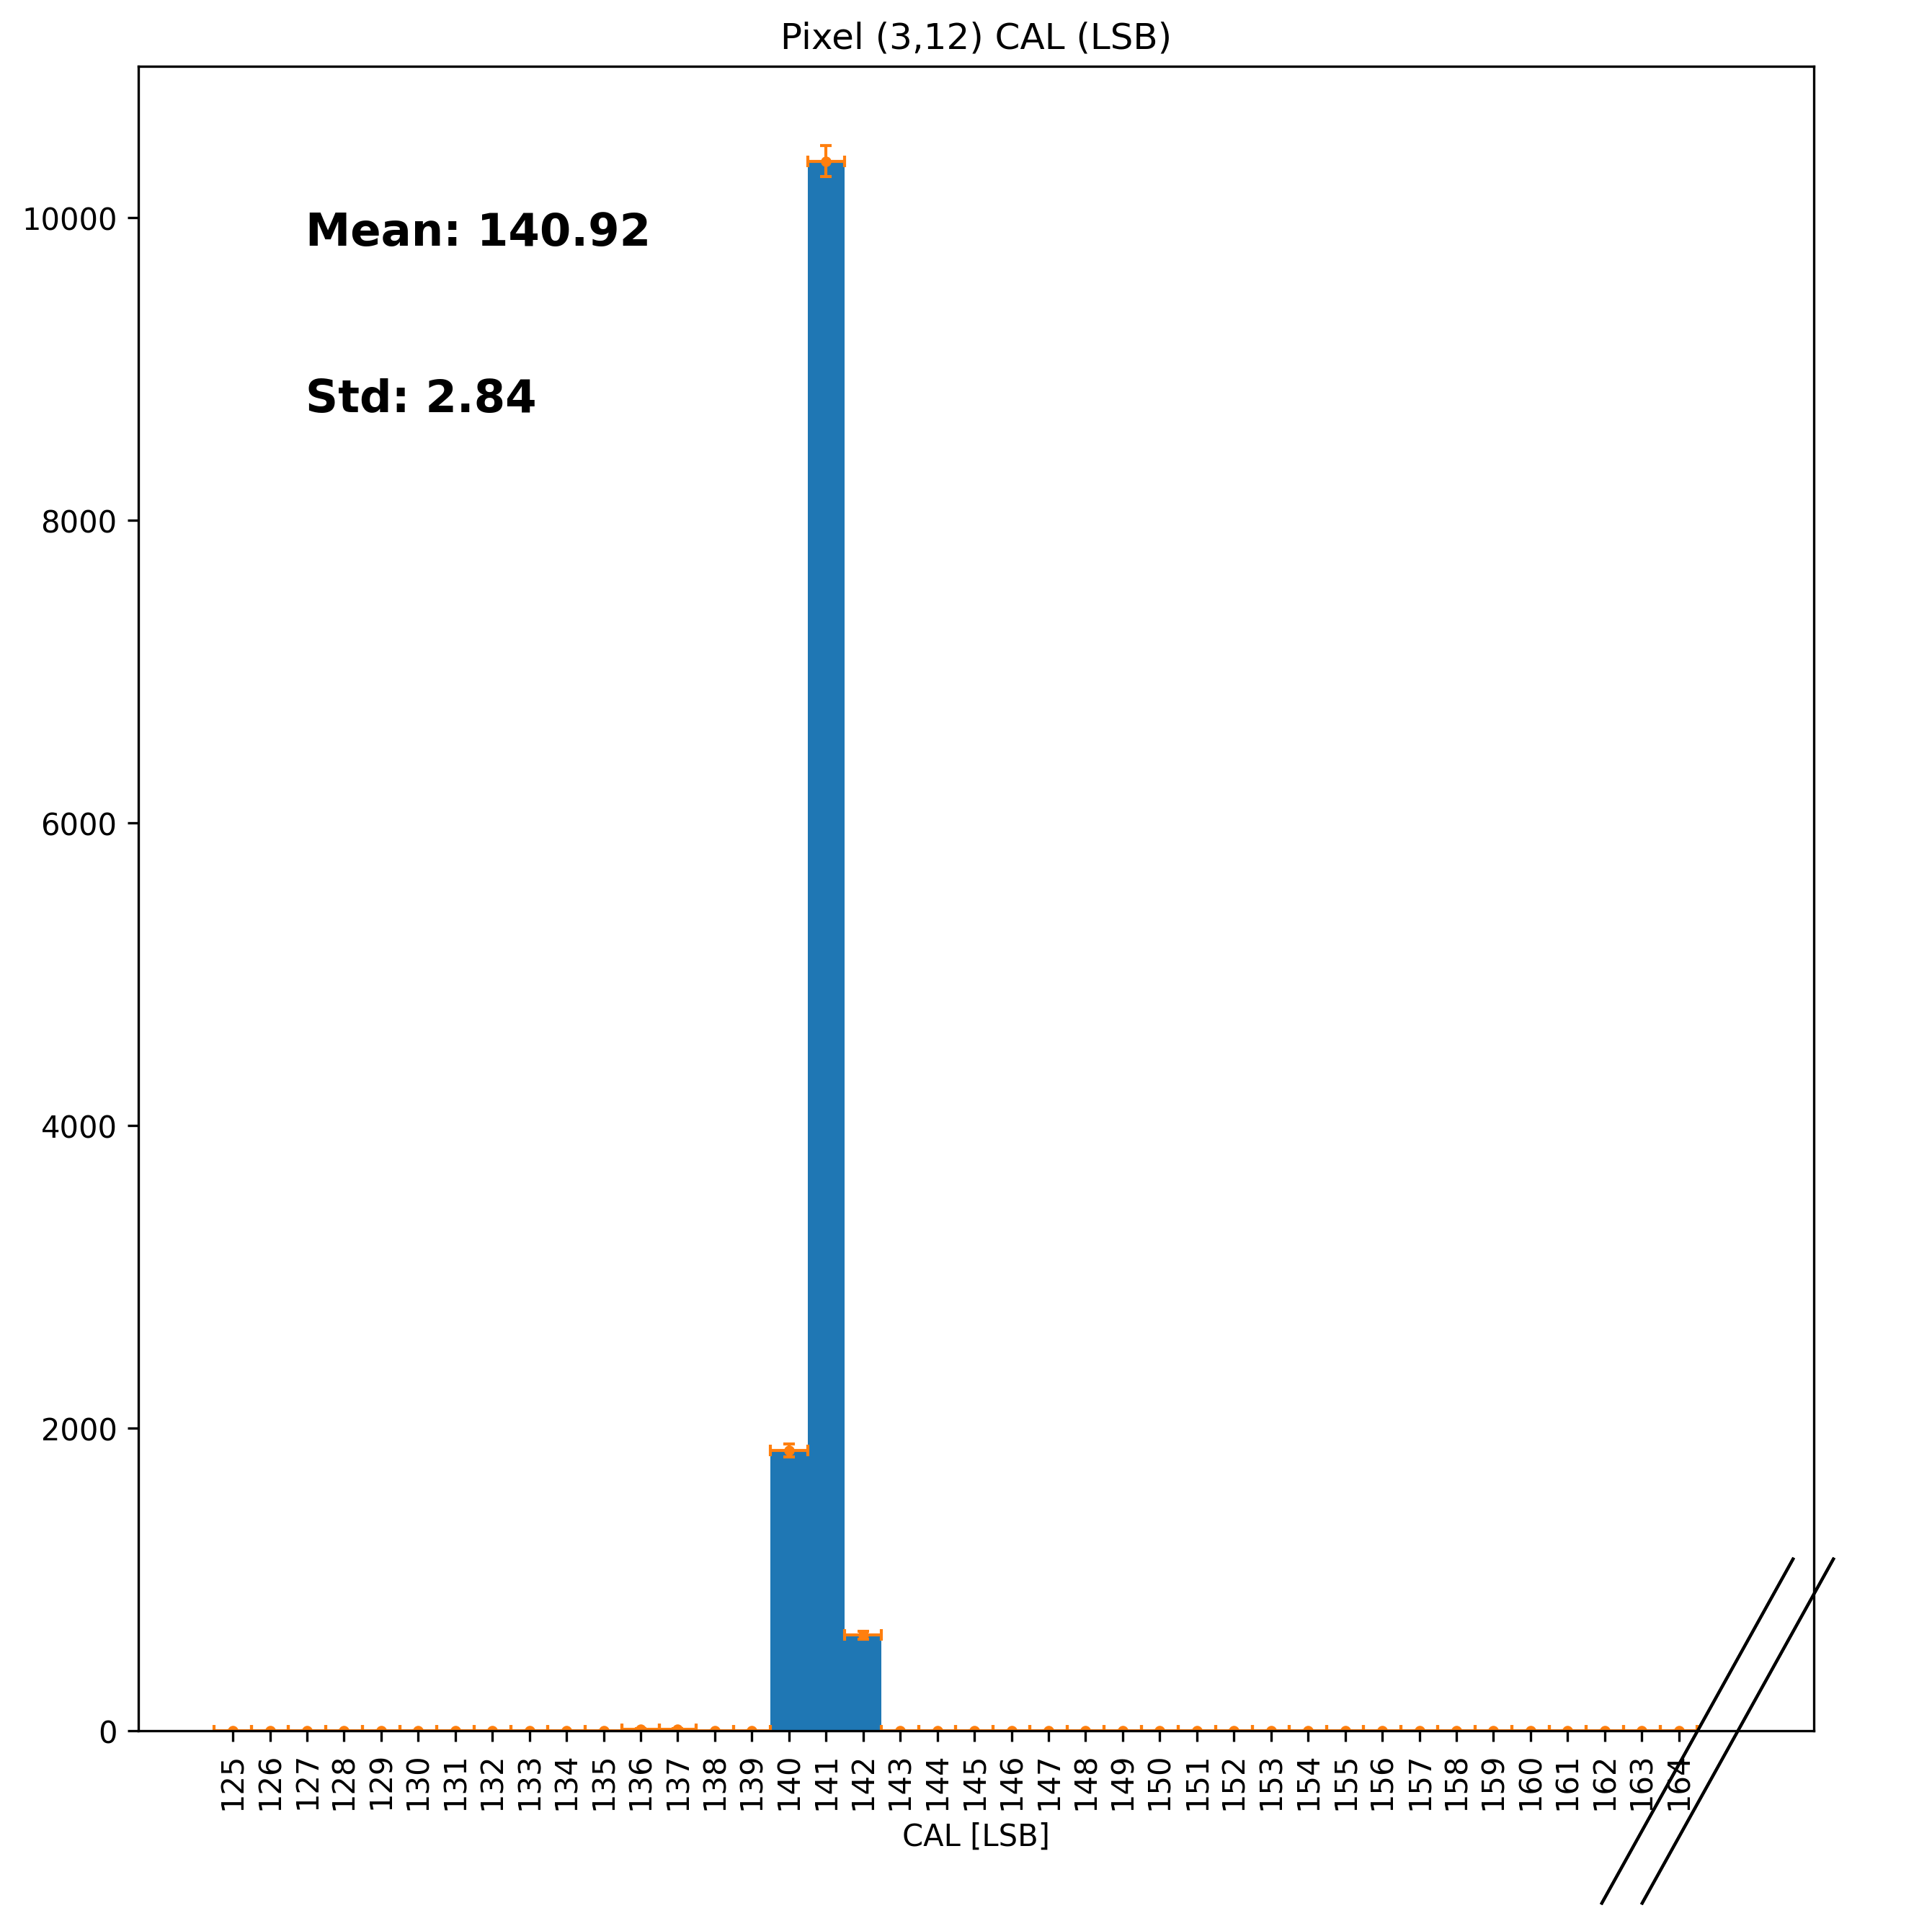

In [23]:
fig = plt.figure(dpi=300, figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Pixel ({3},{12}) CAL (LSB)")
h[3][12].project("CAL").plot1d(ax=ax, lw=1, histtype="fill")
h[3][12].project("CAL").plot1d(ax=ax, lw=1, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
ax.text(0.1, 0.9, f"Mean: {center_CAL_mean[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
ax.text(0.1, 0.8, f"Std: {center_CAL_std[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
plt.savefig("figures/clusterCenters_CAL_3_12.pdf")
plt.show()

/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


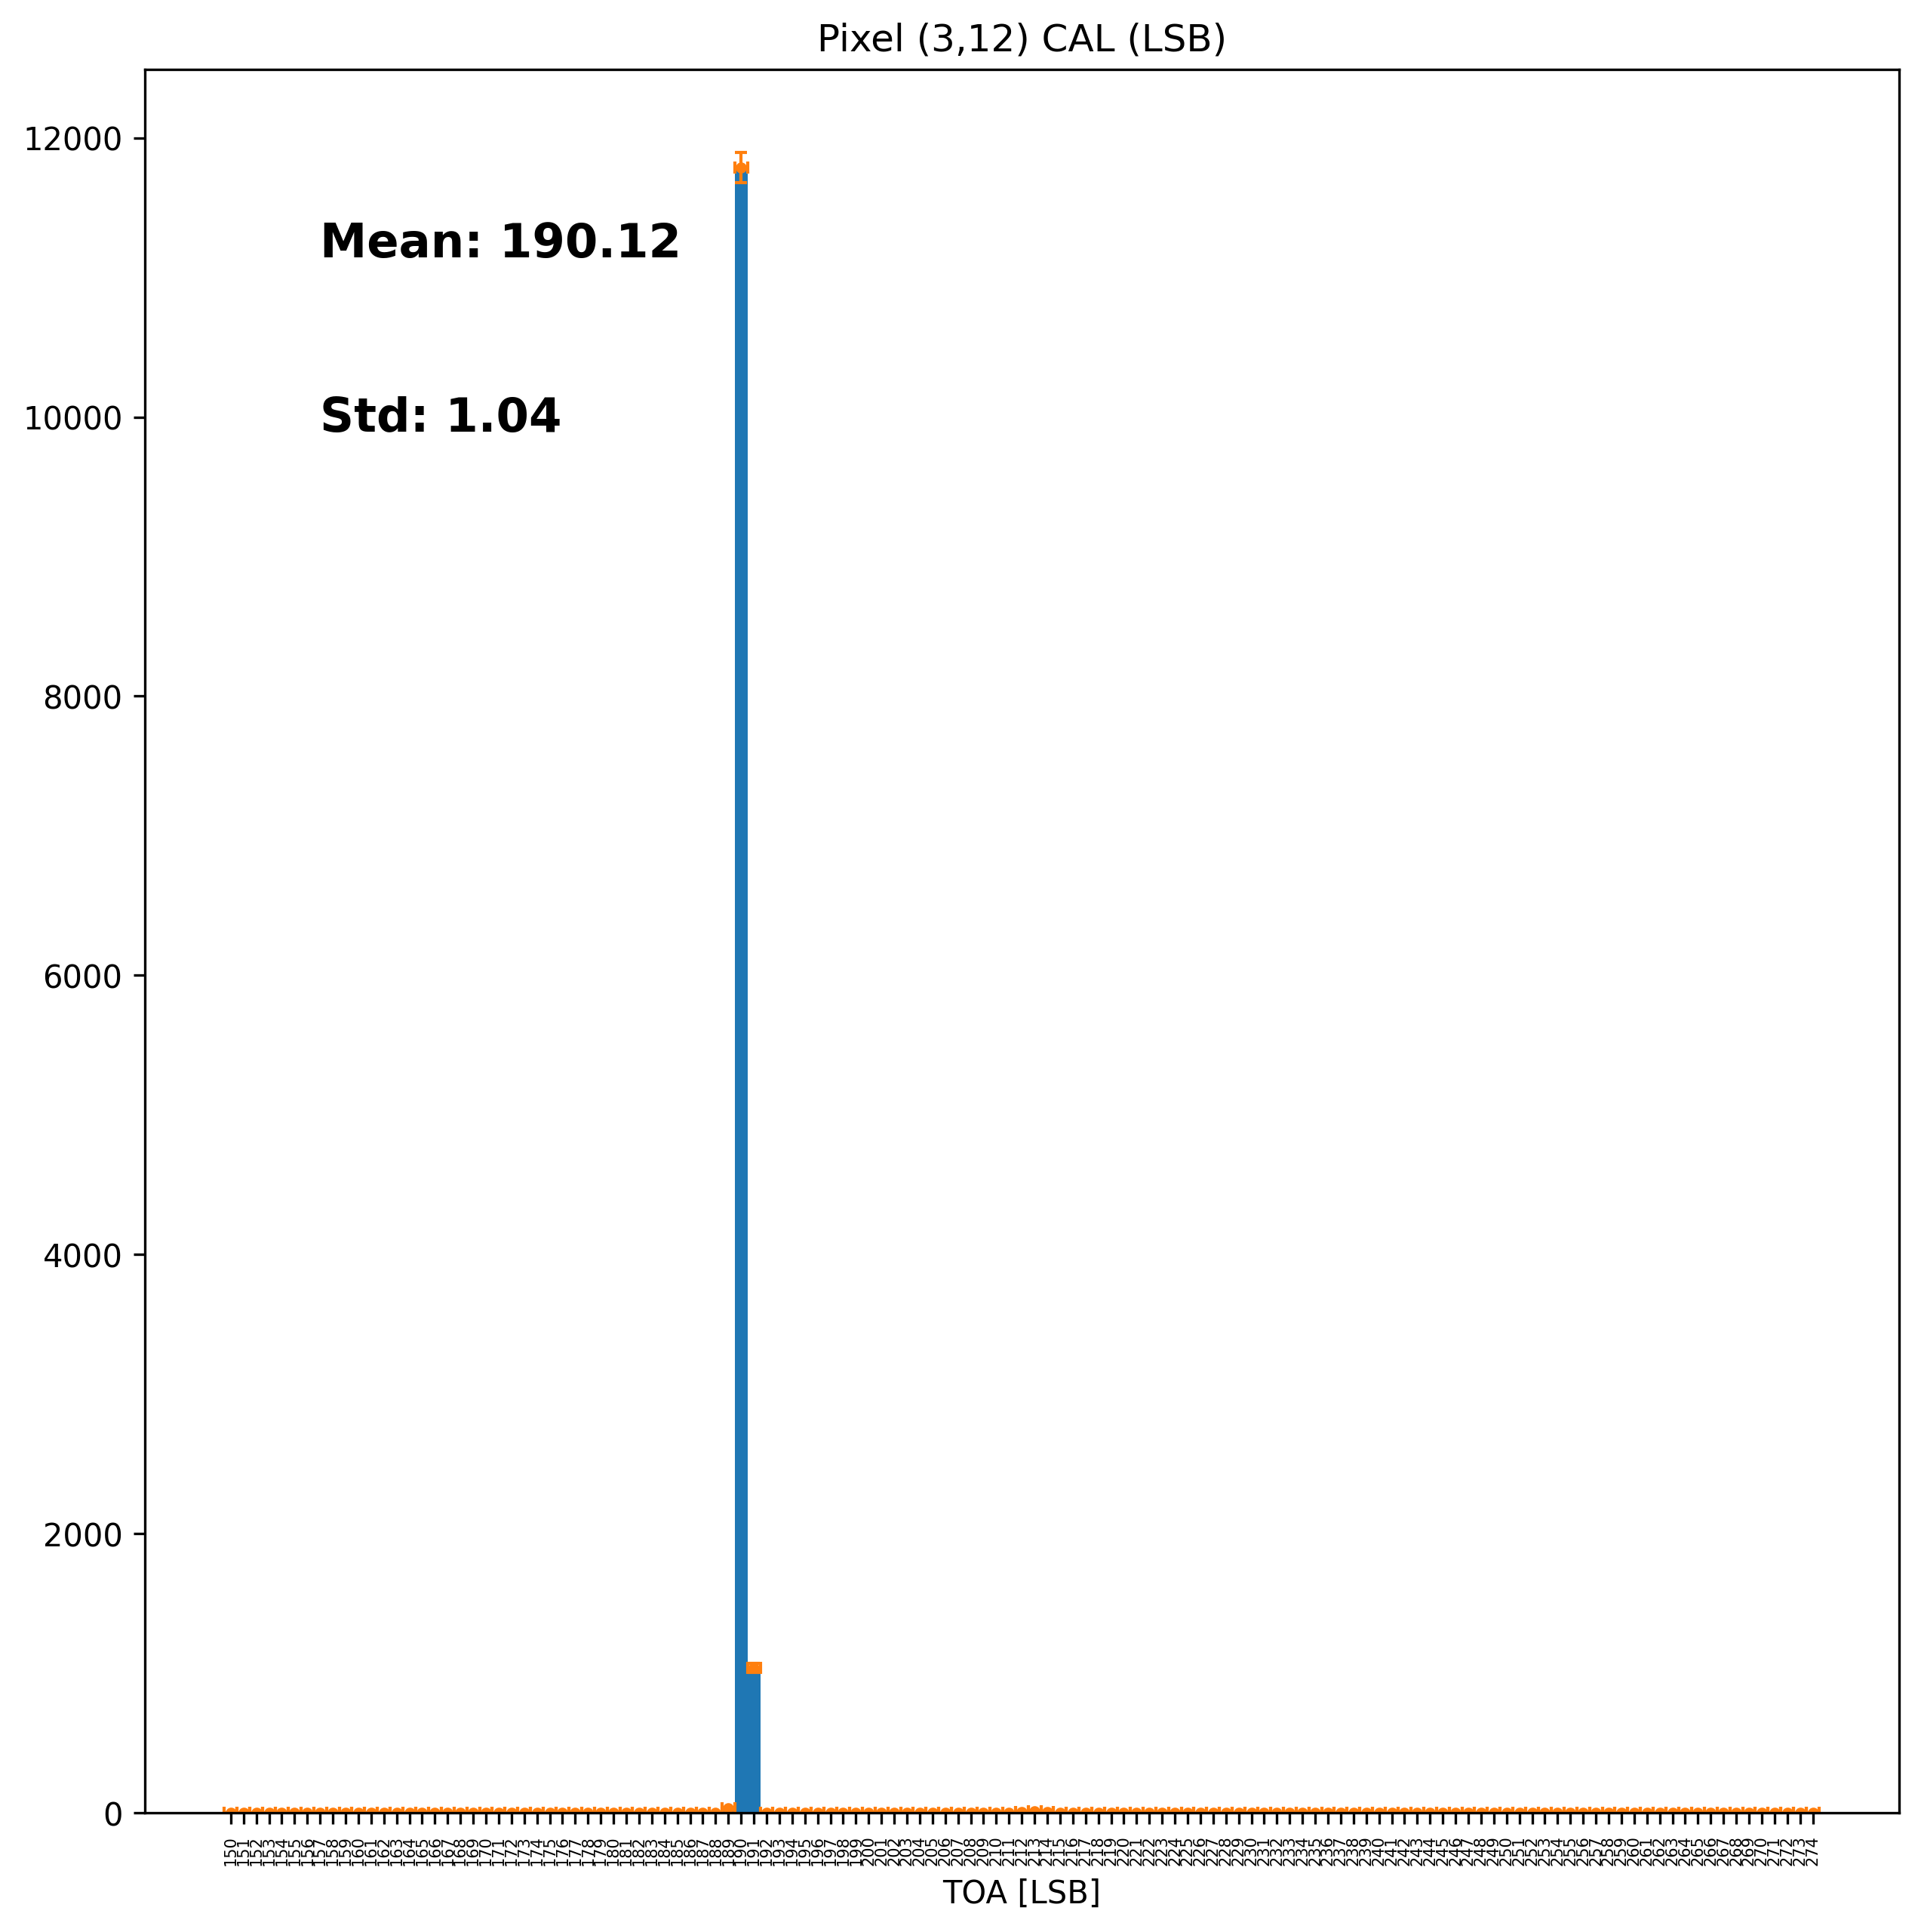

In [24]:
fig = plt.figure(dpi=300, figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Pixel ({3},{12}) CAL (LSB)")
h[3][12].project("TOA").plot1d(ax=ax, lw=1, histtype="fill")
h[3][12].project("TOA").plot1d(ax=ax, lw=1, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical', size=5)
ax.text(0.1, 0.9, f"Mean: {center_TOA_mean[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
ax.text(0.1, 0.8, f"Std: {center_TOA_std[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
plt.savefig("figures/clusterCenters_TOA_3_12.pdf")
plt.show()

/Users/murtazas-local/.pyenv/versions/my_3.11.2/lib/python3.11/site-packages/mplhep/utils.py:271: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


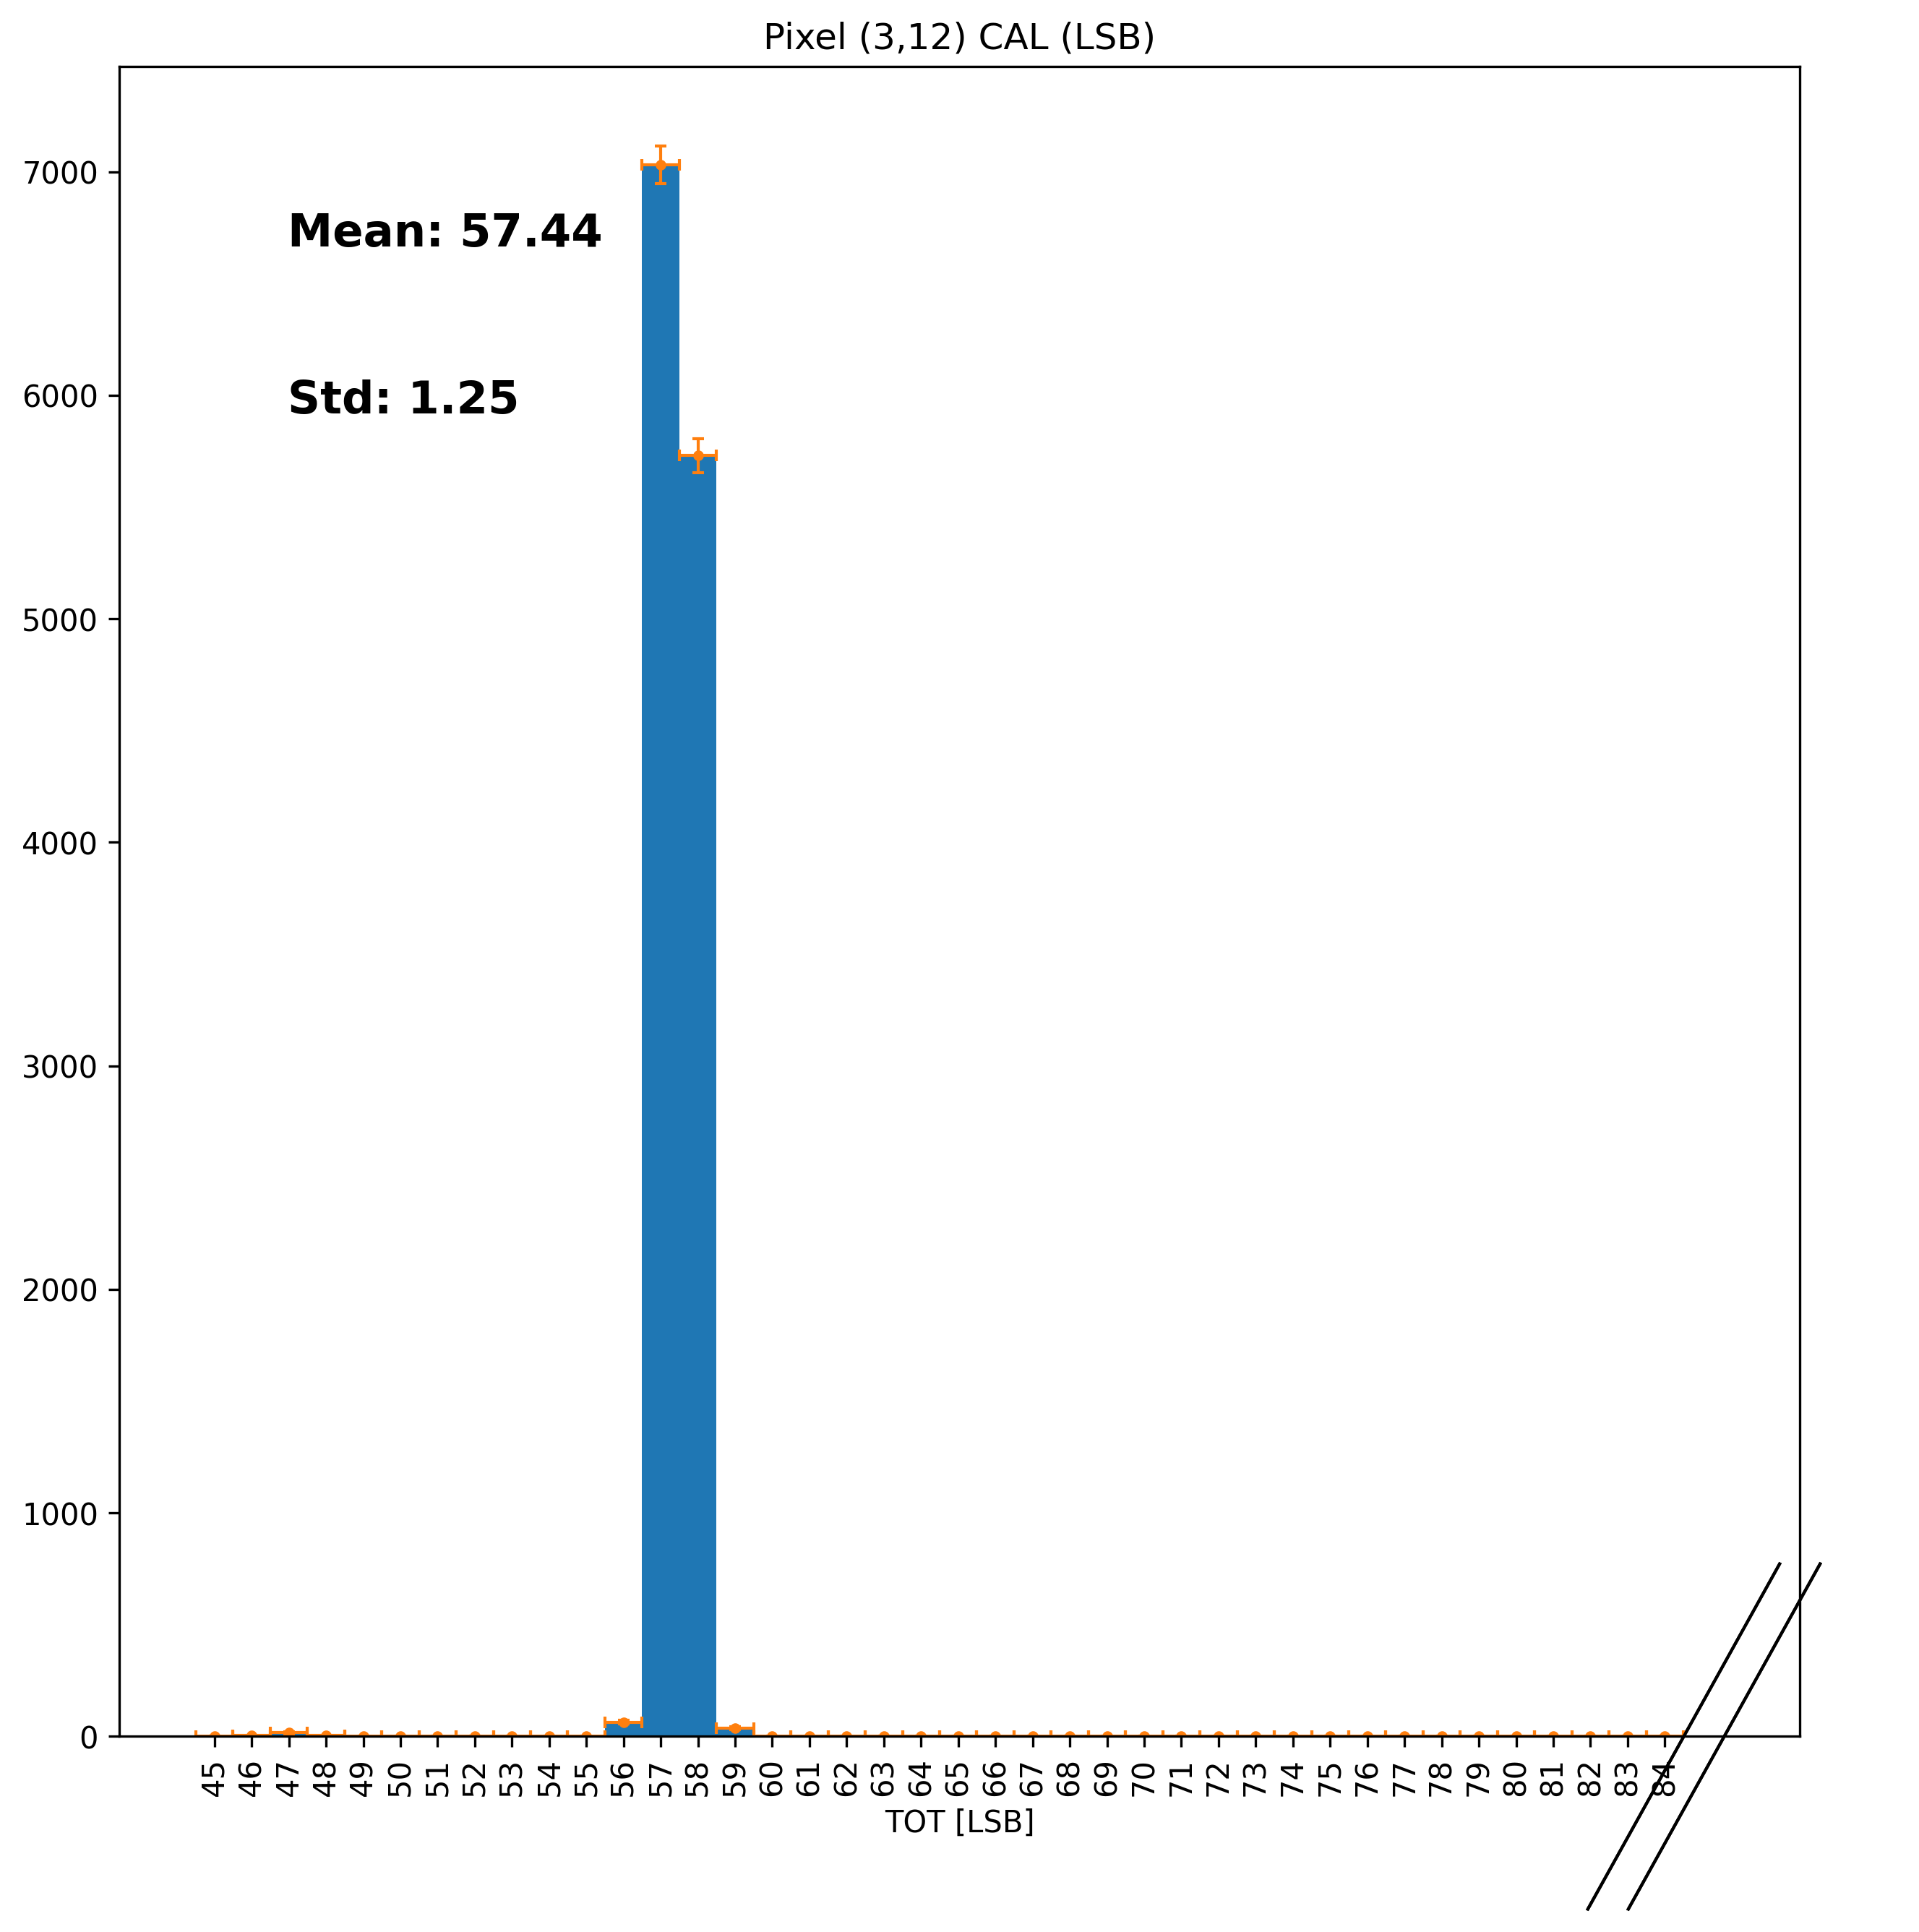

In [25]:
fig = plt.figure(dpi=300, figsize=(10,10))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.set_title(f"Pixel ({3},{12}) CAL (LSB)")
h[3][12].project("TOT").plot1d(ax=ax, lw=1, histtype="fill")
h[3][12].project("TOT").plot1d(ax=ax, lw=1, marker='.', histtype="errorbar", fillstyle='full', xerr=True, capsize=2, markersize=5)
ax.set_xticks(ax.get_xticks(),ax.get_xticklabels(), rotation='vertical')
ax.text(0.1, 0.9, f"Mean: {center_TOT_mean[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
ax.text(0.1, 0.8, f"Std: {center_TOT_std[3,12]:.2f}", ha="left", va="center", fontweight="bold", c="black", size=15, transform=ax.transAxes)
plt.savefig("figures/clusterCenters_TOT_3_12.pdf")
plt.show()